# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset: gutiarDB.csv - 850 Chord Combinations on Ultimate Guitar App.  Yes, I am aware the original filename was incorrectly spelled as gutiarDB. Perhaps that was on purpose (like Green M&Ms in a rider) or possible meme? It was making me crazy, so I Renamed the CSV file to correct spelling.

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [10]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

df = pd.read_csv('guitarDB.csv')   #importing all libraries and dataset. Renamed file- the typo was unbearable! :D

## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [12]:
#View the columns by .head
df.head()

,Artist,Song Name,Song Rating,Song Hits,Page Type,Difficulty,Key,Capo,Tuning
0,Jeff Buckley,Hallelujah,"40,045","31,174,526",Chords,novice,Db,1st fret,E A D G B E
1,Ed Sheeran,Perfect,"31,694","25,794,778",Chords,novice,Ab,1st fret,E A D G B E
2,John Legend,All Of Me,"20,169","25,653,362",Chords,novice,Fm,1st fret,E A D G B E
3,Passenger,Let Her Go,"17,267","24,556,593",Chords,novice,Em,7th fret,E A D G B E
4,Led Zeppelin,Stairway To Heaven,"11,839","20,762,763",Tab,intermediate,Am,No Capo,E A D G B E


In [13]:
#View end of dataset by .tail -shows 849 records.
df.tail()

,Artist,Song Name,Song Rating,Song Hits,Page Type,Difficulty,Key,Capo,Tuning
845,ZZ Top,Beer Drinkers And Hell Raisers,23,"1,406,368",Chords,intermediate,Db,No Capo,E A D G B E
846,Weezer,Weezer Album,9,"1,406,306",Tab,intermediate,Db,No Capo,E A D G B E
847,Misc Soundtrack,Mission Impossible 2 - Nyah,7,"1,406,081",Tab,intermediate,Db,No Capo,E A D G B
848,Radiohead,Fake Plastic Trees,"2,448","1,406,413",Chords,intermediate,A,No Capo,E A D G B E
849,Yes,Long Distance Runaround,17,"1,405,613",Bass,intermediate,Db,No Capo,E A D G B E


In [14]:
#View a complete overview with .info  -Appears to have all fields present.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Artist       850 non-null    object
 1   Song Name    850 non-null    object
 2   Song Rating  850 non-null    object
 3   Song Hits    850 non-null    object
 4   Page Type    850 non-null    object
 5   Difficulty   850 non-null    object
 6   Key          850 non-null    object
 7   Capo         850 non-null    object
 8   Tuning       850 non-null    object
dtypes: object(9)
memory usage: 59.9+ KB


In [17]:
#View the shape of the data with .shape - 850 rows, and 9 columns

(850, 9)

In [18]:
#view the size of the data with .size - 7650 pieces of data- which would indicate multiple duplicates. Duplicates in this kind of data is a GOOD thing.
df.size

7650

In [19]:
#view numerical data with .describe
df.describe()

,Artist,Song Name,Song Rating,Song Hits,Page Type,Difficulty,Key,Capo,Tuning
count,850,850,850,850,850,850,850,850,850
unique,342,752,751,849,5,6,30,16,18
top,Taylor Swift,Wonderwall,"2,473","1,556,006",Chords,intermediate,Db,No Capo,E A D G B E
freq,27,4,4,2,680,510,235,549,616


In [21]:
#Check for any null values- Predicted there would be no nulls, there are none!
df.isnull().sum()

Artist         0
Song Name      0
Song Rating    0
Song Hits      0
Page Type      0
Difficulty     0
Key            0
Capo           0
Tuning         0
dtype: int64

In [22]:
#check for any "NaN or NA" values - and here we find values that do not represent true data.
df.isna()

,Artist,Song Name,Song Rating,Song Hits,Page Type,Difficulty,Key,Capo,Tuning
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
845,False,False,False,False,False,False,False,False,False
846,False,False,False,False,False,False,False,False,False
847,False,False,False,False,False,False,False,False,False
848,False,False,False,False,False,False,False,False,False


In [23]:
#Viewing for any other data to give insight to fields of data
df.nunique()

Artist         342
Song Name      752
Song Rating    751
Song Hits      849
Page Type        5
Difficulty       6
Key             30
Capo            16
Tuning          18
dtype: int64

In [24]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
845    False
846    False
847    False
848    False
849    False
Length: 850, dtype: bool

In [25]:
df.value_counts()

Artist             Song Name                                 Song Rating  Song Hits   Page Type  Difficulty    Key   Capo     Tuning            
3 Doors Down       Here Without You                          1,501        1,481,503   Chords     intermediate   Bbm  No Capo   Eb Ab Db Gb Bb Eb    1
Nirvana            Where Did You Sleep Last Night Acoustic   1,992        3,128,942   Chords     intermediate   E    No Capo   Eb Ab Db Gb Bb Eb    1
Oasis              Champagne Supernova                       899          1,452,346   Chords     intermediate  Db    No Capo  E A D G B E           1
                   Dont Look Back In Anger                   11,981       12,942,507  Chords     novice         C    No Capo   E A D G B E          1
                   Half The World Away                       2,043        1,732,471   Chords     novice         C    No Capo   E A D G B E          1
                                                                                                         

In [39]:
#Locate the highest number of songs by key - we have 235 in D-flat.(C sharp, F, and A-flat)
topkey = df.value_counts('Key')
print(topkey)

Key
Db      235
 C       95
 G       86
 D       58
 Em      48
 Am      48
 A       41
 F       35
 E       26
 Bm      23
 Dm      17
 B       16
 F#m     14
 Eb      13
 Cm      12
 Bb      11
 Ab      10
 Db      10
 Bbm      9
 Ebm      8
 Gm       8
 C#m      7
 Fm       6
 F#       4
 Gb       3
 Abm      2
 C#       2
 A#m      1
 D#m      1
 G#m      1
dtype: int64


In [43]:
#Finding the top 25 songs by rating - even though Db appears the most at 9 times in the top 25 songs, the Key of C only appears twice.

df.sort_values(['Song Rating']).head(25)


,Artist,Song Name,Song Rating,Song Hits,Page Type,Difficulty,Key,Capo,Tuning
733,Britney Spears,Baby One More Time,"1,005","1,556,006",Chords,intermediate,Cm,3rd fret,E A D G B E
209,Ed Sheeran,Lego House,"1,008","3,454,994",Chords,novice,B,4th fret,E A D G B E
167,Jason Mraz,Im Yours,"1,010","4,072,749",Chords,intermediate,B,No Capo,E A D G B E
172,Aerosmith,I Dont Want To Miss A Thing,"1,012","3,962,737",Chords,novice,D,No Capo,E A D G B E
383,Led Zeppelin,Black Dog,"1,013","2,420,288",Tab,intermediate,F#m,No Capo,E A D G B E
568,Taylor Swift,Red,"1,020","1,866,605",Chords,novice,Db,4th fre,E A D G B E
428,Plain White T's,Hey There Delilah,"1,026","2,274,656",Chords,novice,Db,No Capo,E A D G B
285,Justin Bieber,Sorry,"1,027","2,815,778",Chords,novice,F,3rd fret,E A D G B E
181,Death Cab for Cutie,I Will Follow You Into The Dark,"1,028","3,852,542",Chords,intermediate,Db,No Capo,E A D G B
370,The Beatles,Here Comes The Sun,"1,028","2,456,847",Tab,intermediate,Db,7th fre,E A D G B E


In [55]:
#Finding the largest number of times an artist appears in the tabs list.

df['Artist'].value_counts(25)

Taylor Swift       0.031765
Ed Sheeran         0.031765
The Beatles        0.030588
Adele              0.016471
Metallica          0.016471
                     ...   
James Morrison     0.001176
Misc Television    0.001176
Rey Valera         0.001176
Fugees             0.001176
Young MC           0.001176
Name: Artist, Length: 342, dtype: float64

In [87]:
difficulty_count = df.value_counts('Difficulty')
print(difficulty_count)

Difficulty
intermediate    510
novice          326
advanced          5
novic             5
intermediat       3
advance           1
dtype: int64


## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

AttributeError: Rectangle.set() got an unexpected keyword argument 'xlabel'

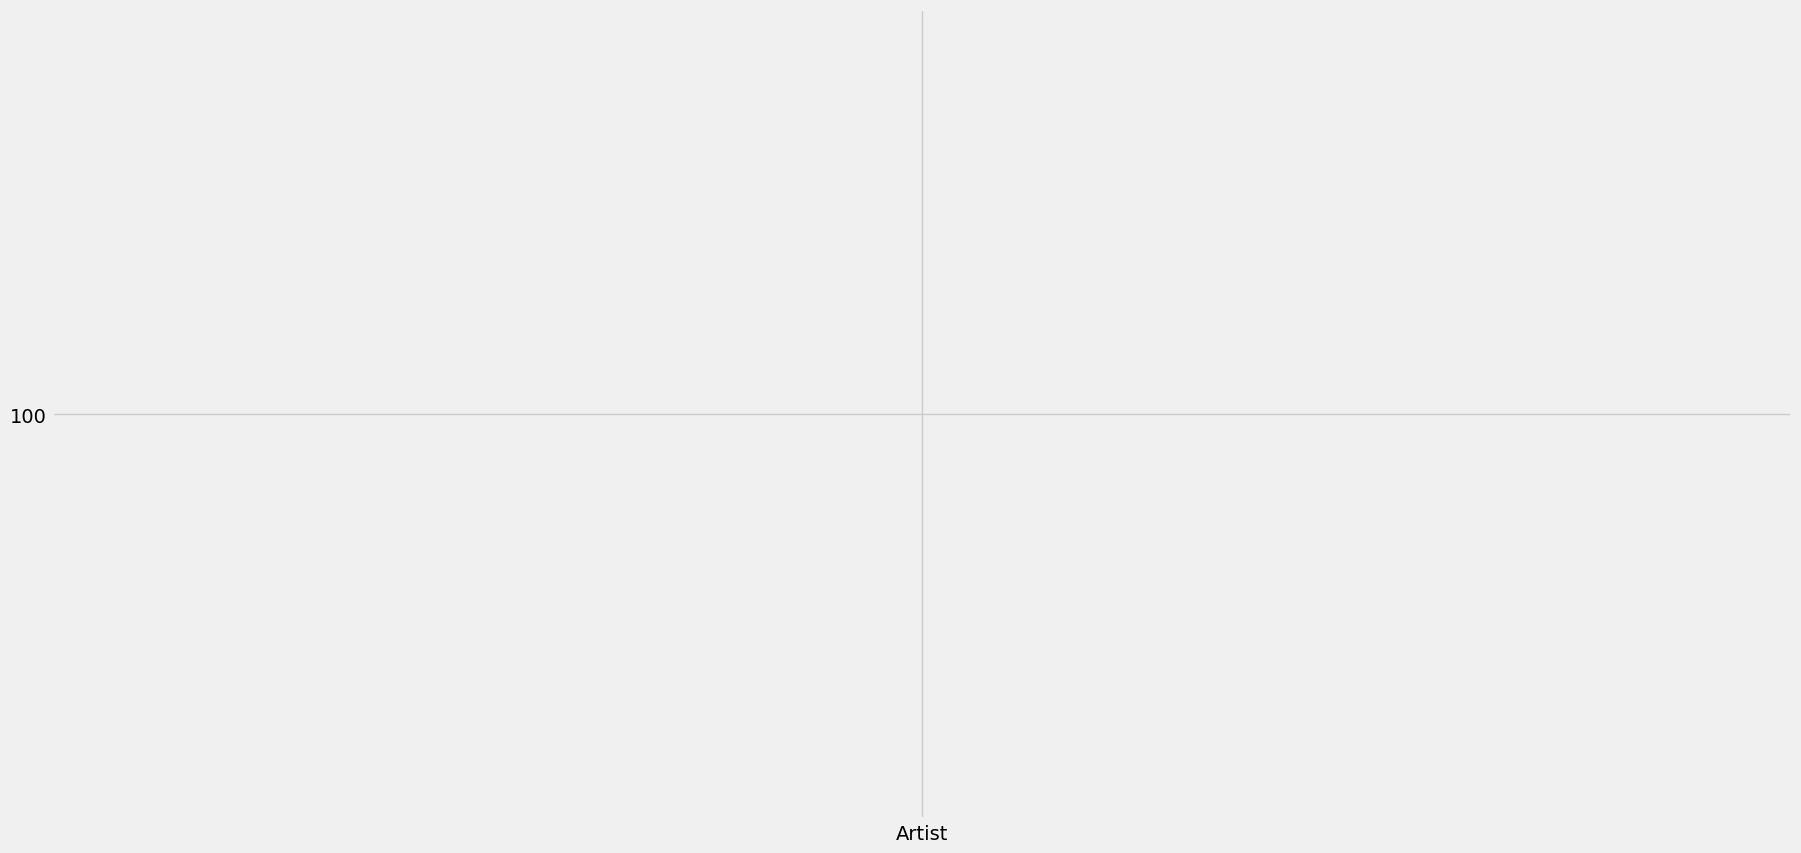

In [18]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style
# setting style for graphs
style.use('fivethirtyeight')
#plt.rcParams['figure.figsize'] = (20,10)

#ax = df.plot.bar(x='Key', stacked=True, title='The most popular keys')

ax = df.plot.bar(x='Artist', stacked=True, color=['tomato','lightseagreen'], figsize=(8,6))
ax.set_title('Top Rated Songs by Artist and Key', fontsize=20)
ax.set_ylim(0,500)
ax.set_xticklabels(['A','B','C'], rotation=0)


In [99]:
x_values = df['Artist', 'Difficulty', 'Key']
y_values = df['Rating']

plt.plot(x_values, y_values)

KeyError: ('Artist', 'Difficulty', 'Key')

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? D-flat having that many songs in the key was shocking. Drastic difference from the number 2 spot, key of C. I would have thought C to be more popular as it's an easier key to play and sing in. 
2. Do you have any concerns about your dataset? No concerns with this dataset.
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? That some of the tuning is for 6-stringed instruments, and some are for 5-stringed or less.